## <u> Building And Evaluating A Credit Scoring Model To Predict Default Probability <u>

### Perspective:

* The model demonstrates the application of data analytics and machine learning to predict the likelihood of default by credit applicants 
  based on historical and current data.This report is intended for personnels interested in assesing the risk of default among 
  credit applicants.

### Objective:

* To develop a predictive model that can estimate the probability of an applicant defaulting compared to his/her current and 
   historical data.

In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv('german_credit_data(1).csv')
dataset.sample(4)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
474,474,33,male,2,own,little,moderate,1245,18,radio/TV,bad
105,105,39,male,3,own,little,moderate,11938,24,vacation/others,bad
971,971,43,male,1,own,little,NaN,7393,24,car,good
317,317,48,female,1,own,NaN,moderate,4351,24,furniture/equipment,good


In [4]:
df=dataset.drop('Unnamed: 0',axis=1)
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
655,22,male,2,free,little,little,3973,14,car,good
644,32,male,3,own,little,little,1880,18,radio/TV,good
543,34,male,1,own,little,rich,2864,18,furniture/equipment,bad


In [5]:
#Checking for missing values
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
defaulter             0
dtype: int64

In [6]:
#Dealing with missing values
df.dropna(axis='columns',inplace=True)
df.sample(5)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,defaulter
272,36,male,3,free,12169,48,car,good
675,26,female,3,rent,4530,30,radio/TV,good
574,27,male,1,own,1082,9,radio/TV,good
774,66,male,0,free,1480,12,car,good
680,56,female,2,own,1538,6,education,good


In [7]:
df.dtypes

Age               int64
Sex              object
Job               int64
Housing          object
Credit amount     int64
Duration          int64
Purpose          object
defaulter        object
dtype: object

In [8]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])
df.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,defaulter
0,67,1,2,own,1169,6,radio/TV,good
1,22,0,2,own,5951,48,radio/TV,bad
2,49,1,1,own,2096,12,education,good
3,45,1,2,free,7882,42,furniture/equipment,good
4,53,1,2,free,4870,24,car,bad


In [9]:
df['Housing']=df['Housing'].astype('category')

In [10]:
df['Housing']=df['Housing'].cat.codes

In [11]:
df['Purpose']=df['Purpose'].astype('category')

In [12]:
df['Purpose']=df['Purpose'].cat.codes

In [13]:
df['defaulter']=df['defaulter'].astype('category')

In [14]:
df['defaulter']=df['defaulter'].cat.codes

In [15]:
df.sample(10)

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,defaulter
728,59,0,2,2,6416,48,0,0
50,29,1,1,1,2333,24,4,1
82,24,0,1,2,1568,18,0,1
88,30,1,3,1,2249,18,1,1
387,40,1,3,1,7374,18,4,1
98,36,1,2,1,2337,36,5,1
738,45,1,3,1,6761,6,1,1
302,37,1,1,1,1344,24,1,0
559,31,1,1,1,1928,18,4,0
49,28,0,2,1,2073,12,5,1


#### Data Analysis

In [16]:
# Descriptive statistics
df.describe(include='all')

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,defaulter
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,0.690000,1.904000,1.071000,3271.258000,20.903000,2.878000,0.700000
std,11.375469,0.462725,0.653614,0.531264,2822.736876,12.058814,1.978138,0.458487
min,19.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000
25%,27.000000,0.000000,2.000000,1.000000,1365.500000,12.000000,1.000000,0.000000
50%,33.000000,1.000000,2.000000,1.000000,2319.500000,18.000000,3.000000,1.000000
75%,42.000000,1.000000,2.000000,1.000000,3972.250000,24.000000,5.000000,1.000000
max,75.000000,1.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000


In [17]:
#Correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [18]:
df.corr()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,defaulter
Age,1.000000,0.161694,0.015673,-0.301419,0.032716,-0.036136,-0.074084,0.091127
Sex,0.161694,1.000000,0.070298,-0.219844,0.093482,0.081432,-0.063231,0.075493
Job,0.015673,0.070298,1.000000,-0.107191,0.285385,0.210910,-0.025326,-0.032735
Housing,-0.301419,-0.219844,-0.107191,1.000000,-0.135632,-0.157049,0.020633,-0.019315
Credit amount,0.032716,0.093482,0.285385,-0.135632,1.000000,0.624984,-0.151720,-0.154739
Duration,-0.036136,0.081432,0.210910,-0.157049,0.624984,1.000000,-0.083459,-0.214927
Purpose,-0.074084,-0.063231,-0.025326,0.020633,-0.151720,-0.083459,1.000000,0.061145
defaulter,0.091127,0.075493,-0.032735,-0.019315,-0.154739,-0.214927,0.061145,1.000000


In [20]:
df.rename(columns={'Credit amount':'Credit_amount'},inplace=True)
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit_amount', 'Duration', 'Purpose',
       'defaulter'],
      dtype='object')

<Axes: >

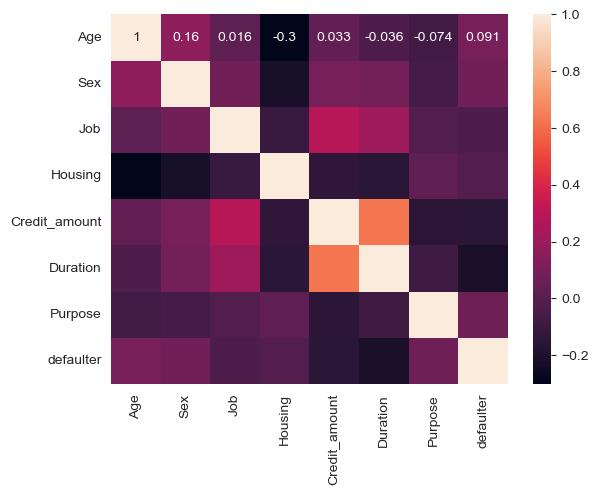

In [22]:
sns.heatmap(df['Age Sex Job Housing Credit_amount Duration Purpose defaulter'.split()].corr(),annot=True)

## Technique Selection:

 * ##### <u> Binary Logistic Regression <u>:
-This is because we are predicting the probability of a categorical dependent variable(defaulter i.e target variable) that is
  binary and contains data coded as 1(good) or 0(bad).
  
-Binary Logistic Regression also because of its easy interpretability and ease of implementation.

#### Most Important Variables:
* Sex.
  
* Credit_amount.

* Job.
  
* Duration.
  
* purpose.

-The selected varibles have high correlation on default probability thus a higher impact. 

In [23]:
df1=df.drop('Age',axis=1)
df2=df1.drop('Housing',axis=1)
df2.sample(5)

,Sex,Job,Credit_amount,Duration,Purpose,defaulter
206,1,2,1935,12,4,1
459,1,2,4594,18,5,1
565,0,2,1553,24,5,1
167,0,2,1577,11,4,1
149,1,2,1582,18,5,1


### Splitting the Data into Features(x) And Targets(y)

In [26]:
x=df2.iloc[:,:-1]
y=pd.DataFrame(df2.iloc[:,-1])
y
#x

,defaulter
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


### Logistic Regression Fitting

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Predicting The Test Results

In [28]:
y_pred=logreg.predict(x_test)

### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[  9  87]
 [  8 226]]


## <u> Model Perfomance <u>

### Classification Report.

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.09      0.16        96
           1       0.72      0.97      0.83       234

    accuracy                           0.71       330
   macro avg       0.63      0.53      0.49       330
weighted avg       0.67      0.71      0.63       330

